In [5]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'PASTE YOUR API KEY HERE'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2020-12-31' }, paginate=True)
data.head()

,date,ticker,adj_close
None,,,
0,2018-03-27,WMT,86.05
1,2018-03-26,WMT,87.50
2,2018-03-23,WMT,85.42
3,2018-03-22,WMT,87.14
4,2018-03-21,WMT,88.18


In [6]:
data.shape

(5325, 3)

In [8]:

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table.head()

adj_close                                         
ticker            CNP          F         GE    TSLA        WMT
date                                                          
2014-01-02  19.116238  12.726742  24.266002  150.10  71.343743
2014-01-03  19.107861  12.784441  24.248354  149.56  71.108673
2014-01-06  19.132992  12.842140  24.054226  147.00  70.710863
2014-01-07  19.334039  12.677286  24.080698  149.36  70.927850
2014-01-08  19.132992  12.809169  24.010106  151.28  70.367299

In [10]:
clean["ticker"].value_counts()

CNP     1065
F       1065
GE      1065
TSLA    1065
WMT     1065
Name: ticker, dtype: int64

In [21]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'YOUR-API-KEY'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
quandl.ApiConfig.api_key = 's1khgurxZxssiAQ6bn85'
data = quandl.get_table('WIKI/PRICES', ticker=selected,
                        qopts={'columns': ['date', 'ticker', 'adj_close']},
                        date={'gte': '2014-1-1', 'lte': '2016-12-31'}, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table

adj_close                                         
ticker            CNP          F         GE    TSLA        WMT
date                                                          
2014-01-02  19.116238  12.726742  24.266002  150.10  71.343743
2014-01-03  19.107861  12.784441  24.248354  149.56  71.108673
2014-01-06  19.132992  12.842140  24.054226  147.00  70.710863
2014-01-07  19.334039  12.677286  24.080698  149.36  70.927850
2014-01-08  19.132992  12.809169  24.010106  151.28  70.367299
...               ...        ...        ...     ...        ...
2016-12-23  23.895555  11.800021  31.055560  213.34  68.153672
2016-12-27  23.828189  11.733729  31.075043  219.53  68.310482
2016-12-28  23.520232  11.601144  30.880215  219.74  67.928257
2016-12-29  23.799318  11.582204  30.889956  214.68  67.879254
2016-12-30  23.712705  11.487500  30.782801  213.69  67.742045

[756 rows x 5 columns]

In [23]:

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250
returns_annual

           ticker
adj_close  CNP       0.091859
           F        -0.007358
           GE        0.095399
           TSLA      0.204873
           WMT      -0.000943
dtype: float64

In [27]:
returns_daily.head()

adj_close                                        
ticker           CNP         F        GE      TSLA       WMT
date                                                        
2014-01-02       NaN       NaN       NaN       NaN       NaN
2014-01-03 -0.000438  0.004534 -0.000727 -0.003598 -0.003295
2014-01-06  0.001315  0.004513 -0.008006 -0.017117 -0.005594
2014-01-07  0.010508 -0.012837  0.001101  0.016054  0.003069
2014-01-08 -0.010399  0.010403 -0.002931  0.012855 -0.007903

In [26]:
returns_daily.mean()

           ticker
adj_close  CNP       0.000367
           F        -0.000029
           GE        0.000382
           TSLA      0.000819
           WMT      -0.000004
dtype: float64

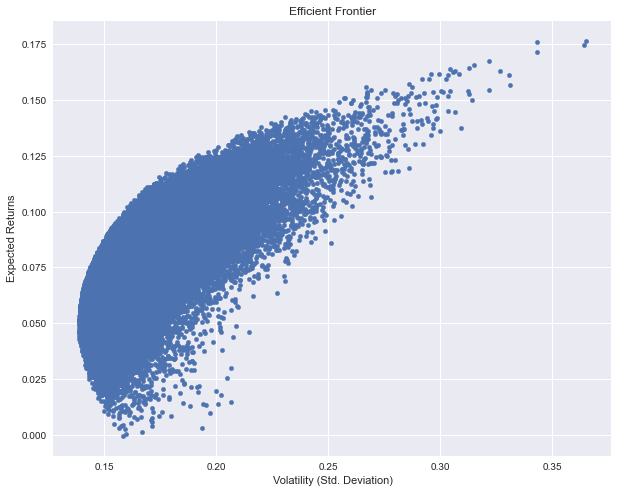

In [28]:

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter, symbol in enumerate(cov_annual.columns):
    portfolio[symbol[1] + ' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock + ' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()